<a href="https://colab.research.google.com/github/Sunnyttc1992/Bean_Classification_with_decisiontree_kmean/blob/main/bean_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

In [3]:
df_features = pd.DataFrame(X)
df_targets = pd.DataFrame(y)

In [4]:
df_targets

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [5]:
# prompt: preprocess the data for ML use

import pandas as pd
# Separate features and target
X = df_features
y = df_targets

# Handle categorical target variable if necessary (Label Encoding)
# Check if y is categorical. For this specific dataset, it's likely a string.
if y.dtypes[0] == 'object':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y.iloc[:, 0])
    y = pd.DataFrame(y_encoded, columns=y.columns)


# Handle missing values (check if any exist, if not, this step is skipped)
# In this specific dataset, there are no missing values according to the UCI page.
# If there were:
# Example for imputation:
# from sklearn.imputation import SimpleImputer
# imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
# X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preprocessing complete.
Shape of X_train: (10888, 16)
Shape of X_test: (2723, 16)
Shape of y_train: (10888, 1)
Shape of y_test: (2723, 1)


<ipython-input-5-aaacc6de9f99>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y.dtypes[0] == 'object':


In [6]:
# prompt: train using Kmean

# Use the scaled training data for KMeans
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)  # Assuming 7 clusters based on the dataset description
kmeans.fit(X_train)

# Get cluster labels for the training data
train_cluster_labels = kmeans.labels_

# Get cluster labels for the testing data
test_cluster_labels = kmeans.predict(X_test)

print("KMeans clustering complete.")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Cluster centers shape: {kmeans.cluster_centers_.shape}")
print(f"First 10 training cluster labels: {train_cluster_labels[:10]}")
print(f"First 10 testing cluster labels: {test_cluster_labels[:10]}")

# Optional: Evaluate KMeans performance (e.g., using inertia)
print(f"Inertia (sum of squared distances of samples to their closest cluster center): {kmeans.inertia_}")

KMeans clustering complete.
Number of clusters: 7
Cluster centers shape: (7, 16)
First 10 training cluster labels: [4 2 5 5 4 6 6 6 6 5]
First 10 testing cluster labels: [0 3 6 4 5 4 0 6 5 2]
Inertia (sum of squared distances of samples to their closest cluster center): 38933.57282829173


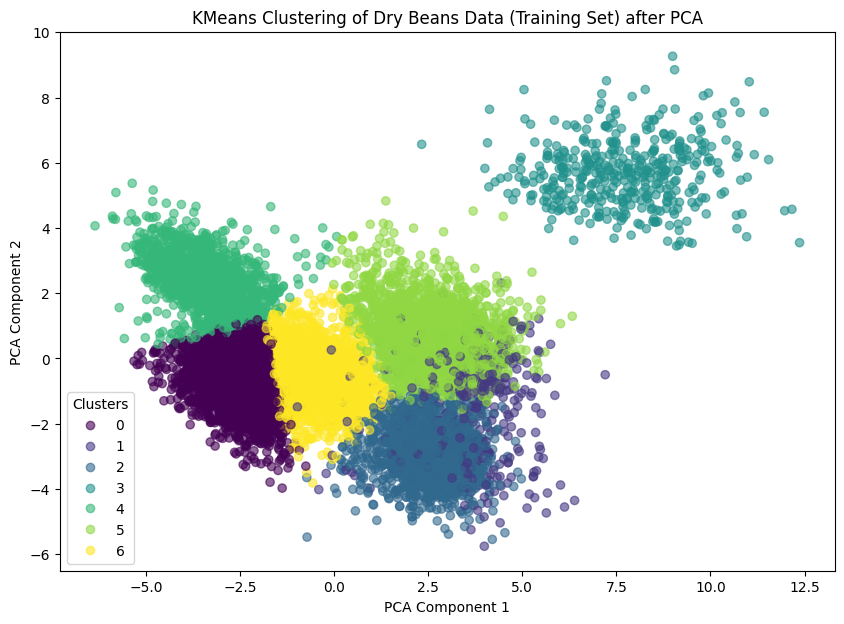

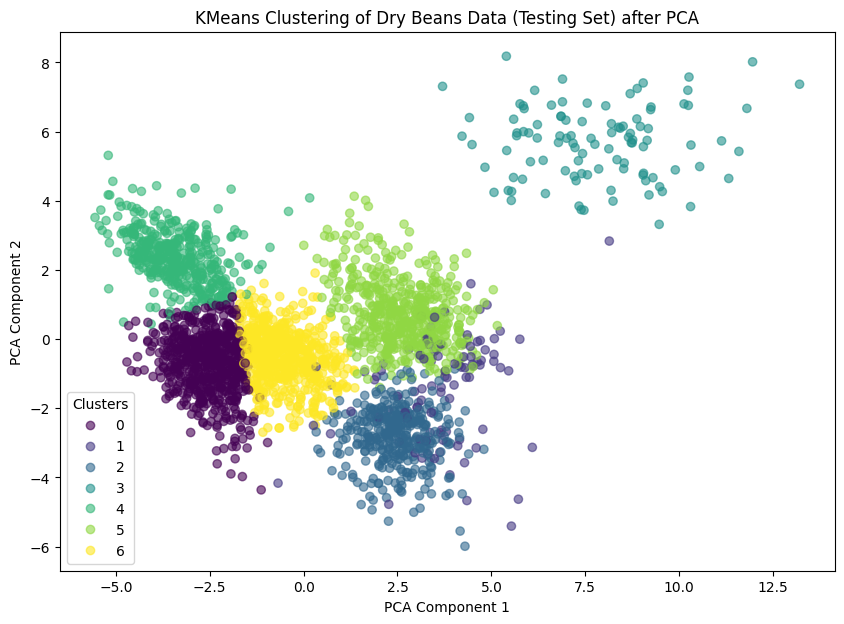

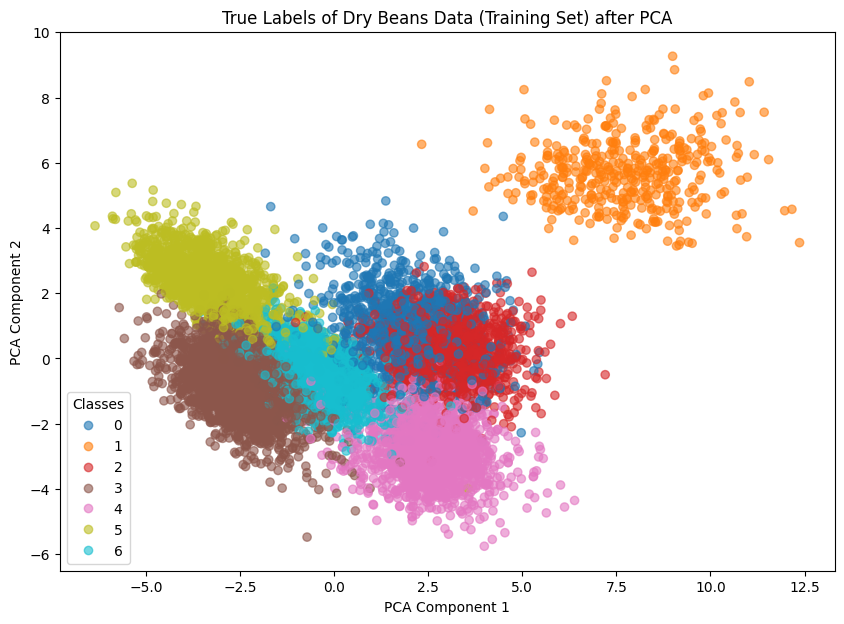

In [7]:
# prompt: Visualize the result

import pandas as pd
import matplotlib.pyplot as plt
# To visualize, we can use PCA to reduce the dimensionality of the data
# to 2 components and then plot the clusters.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the clusters on the training data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_cluster_labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering of Dry Beans Data (Training Set) after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Visualize the clusters on the testing data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_cluster_labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering of Dry Beans Data (Testing Set) after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# We can also compare the clusters to the actual target labels (if available)
# Note that KMeans is unsupervised, so cluster assignments might not directly
# correspond to the original class labels.

# Add cluster labels to the training data for comparison
X_train_viz = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
X_train_viz['Cluster'] = train_cluster_labels
X_train_viz['True_Label'] = y_train.values.flatten() # Assuming y_train is a pandas DataFrame

# Visualize true labels on the training data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_viz['PCA1'], X_train_viz['PCA2'], c=X_train_viz['True_Label'], cmap='tab10', alpha=0.6)
plt.title('True Labels of Dry Beans Data (Training Set) after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [8]:
# prompt: train by decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
# You can tune hyperparameters like max_depth, min_samples_split, etc.
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

print("Decision Tree model training complete.")

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree model training complete.
Decision Tree Accuracy: 0.8920308483290489
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       265
           1       1.00      1.00      1.00       104
           2       0.92      0.91      0.92       326
           3       0.88      0.90      0.89       709
           4       0.94      0.91      0.93       386
           5       0.91      0.95      0.93       406
           6       0.83      0.79      0.81       527

    accuracy                           0.89      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.89      0.89      0.89      2723



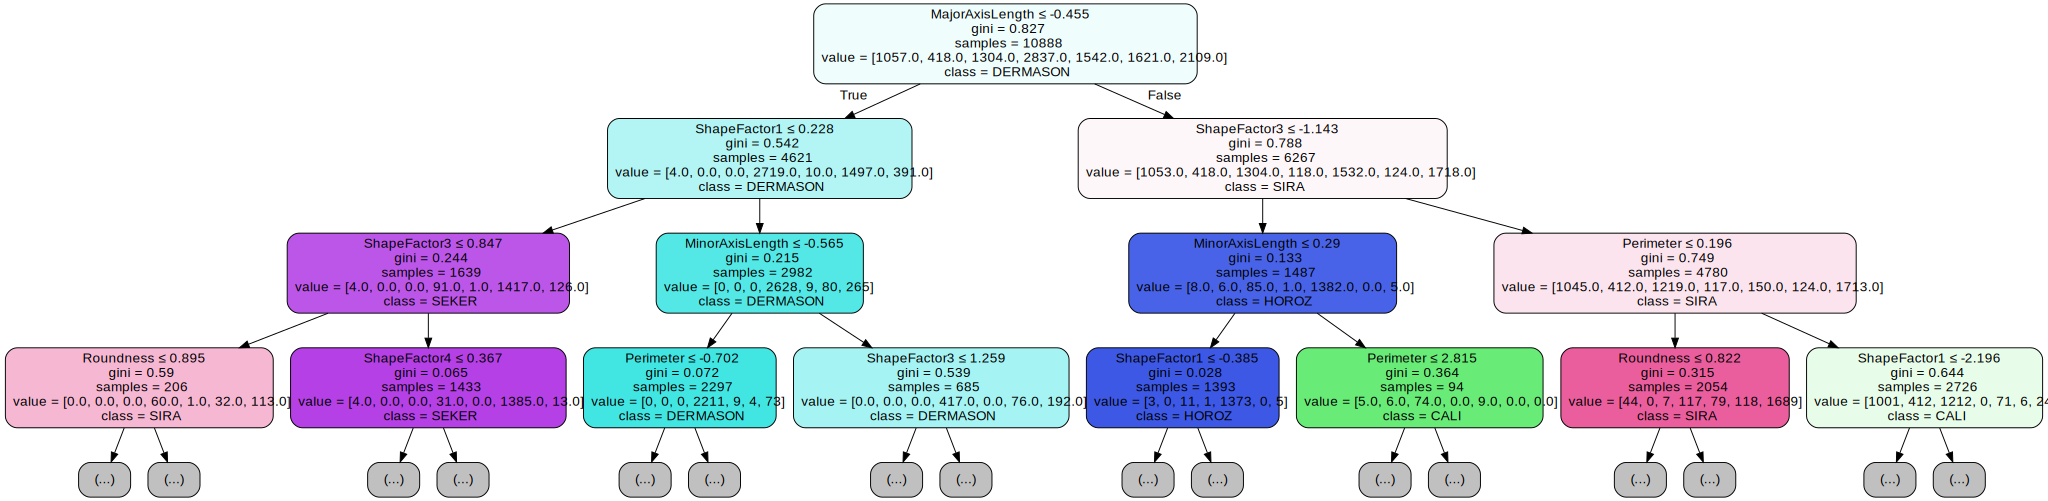

In [10]:
# prompt: Visualize the decision tree.
from sklearn.tree import export_graphviz
import graphviz
import io

# Visualize the trained Decision Tree
# Create a graphviz object from the tree export
dot_data = export_graphviz(decision_tree,
                           out_file=None, # Output to string
                           feature_names=X.columns, # Feature names from original data
                           class_names=[str(c) for c in label_encoder.classes_], # Class names from the label encoder
                           filled=True, # Color nodes by class
                           rounded=True, # Round corners of nodes
                           special_characters=True,
                           max_depth=3) # Limit depth for better visualization

# Render the graph
graph = graphviz.Source(dot_data)
display(graph)

In [12]:
# prompt: save requiement.txt and download

# Generate requirements.txt based on the installed libraries
!pip freeze > requirements.txt

# Download the requirements.txt file
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>